1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import math
import scipy.stats
import pandas as pd
from scipy import stats
from scipy import fftpack

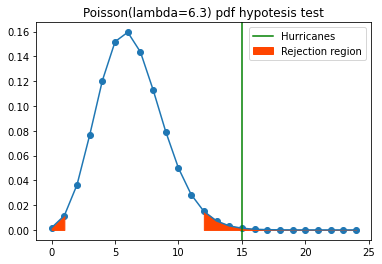

CL: 0.05000 , p-value=  0.00084
Rejection of the null hypotesis: YES


In [2]:
fig, ax = plt.subplots()

x_range=np.arange(0,25)
ax.scatter(x_range,  scipy.stats.poisson.pmf(x_range, 6.3))
ax.plot(x_range,  scipy.stats.poisson.pmf(x_range, 6.3))

alpha=0.05

integrale=np.cumsum(scipy.stats.poisson.pmf(x_range, 6.3))
a = x_range[integrale<alpha/2]
b = x_range[integrale>1-alpha/2]

plt.fill_between(a,scipy.stats.poisson.pmf(a, 6.3),color='orangered')    
plt.fill_between(b,scipy.stats.poisson.pmf(b, 6.3),color='orangered', label="Rejection region")  
ax.axvline(15, color="Green", label="Hurricanes")
plt.legend()
plt.title("Poisson(lambda=6.3) pdf hypotesis test")
plt.show()

p_value=1-scipy.stats.poisson.cdf(15, 6.3)
print("CL: %.5f" % alpha, ", p-value=  %.5f"  % p_value)
print("Rejection of the null hypotesis:", "YES" if p_value<alpha/2 else "NO")


Z = 3.4661629670697414


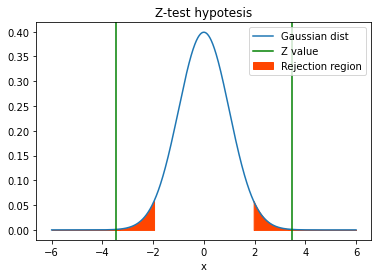

CL: 0.05000 , p-value=  0.00053
Rejection of the null hypotesis: YES


In [67]:
mu=6.3
x0=15
sigma= math.sqrt(mu)


Z = abs(x0 - mu) / sigma  #Assuming a poisson distribution var=mu
print("Z =", Z)

x = np.linspace(-6, +6, 1000)
y = stats.norm.pdf(x)
plt.plot(x, y, label="Gaussian dist")
x_cl1=x[x<-1.96]
x_cl2=x[x>1.96]
plt.fill_between(x_cl1, stats.norm.pdf(x_cl1,0, 1),color='orangered')
plt.fill_between(x_cl2, stats.norm.pdf(x_cl2,0, 1),color='orangered', label="Rejection region")  


plt.axvline(Z,  color='green', label="Z value")
plt.axvline(-Z,  color='green')
plt.xlabel("x")
plt.legend()
plt.title("Z-test hypotesis")
plt.show()

alpha=0.05
pvalue_g = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("CL: %.5f" % alpha, ", p-value=  %.5f"  % pvalue_g)
print("Rejection of the null hypotesis:", "YES" if pvalue_g<alpha/2 else "NO")

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

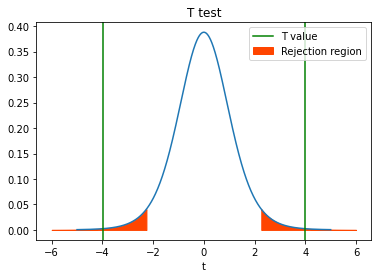

p-value = 0.00315 , T value = -3.99185 

The p-value is less than the chosen level of 0.05, and the T value lays in the rejection region, so we can reject the nullhypotesis and say that the two set of data are not correlates, so the change in blood pressure is statistically significant.


In [79]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

def get_values(array):
    return(np.mean(array), np.std(array))

x1_mean, x1_dev= get_values(pre)
x2_mean, x2_dev= get_values(post)

sigma=math.sqrt((x1_dev**2+x2_dev**2)/2)

n=len(pre)
T= (x1_mean-x2_mean)/(sigma*math.sqrt(2/n))


xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)

x_cl1=x[x<stats.t.ppf(0.025,n-1)]
x_cl2=x[x>stats.t.ppf(0.975,n-1)]
plt.fill_between(x_cl1, stats.t.pdf(x_cl1,n-1),color='orangered')
plt.fill_between(x_cl2, stats.t.pdf(x_cl2,n-1),color='orangered', label="Rejection region")  

plt.axvline(T, color='green', label="T value")
plt.axvline(-T,color='green')
plt.xlabel("t")
plt.legend()
plt.title("T test")
plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value = %.5f" % pvalue, ", T value = %.5f " % T)

print("\nThe p-value is less than the chosen level of 0.05, and the T value lays in the rejection region, so we can reject the null\
hypotesis and say that the two set of data are not correlates, so the change in blood pressure is statistically significant.")


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

In [2]:
df = pd.read_csv('Population.txt', sep="\t")
df

,year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600
5,1905,20600.0,41700.0,39800
6,1906,18100.0,19000.0,38600
7,1907,21400.0,13000.0,42300
8,1908,22000.0,8300.0,44500
9,1909,25400.0,9100.0,42100


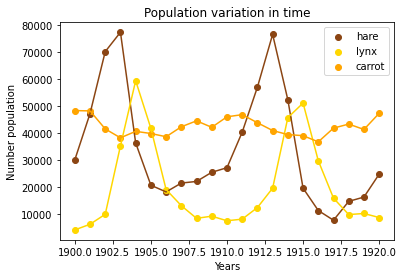

In [4]:
fig, ax = plt.subplots()

def plot_column(ax,df,colonna, colore):
    ax.scatter(df["year"], df[colonna], c=colore, label=colonna)
    ax.plot(df["year"], df[colonna], c=colore)
    
plot_column(ax,df,"hare", "saddlebrown")
plot_column(ax,df,"lynx", "gold")
plot_column(ax,df,"carrot", "orange")

plt.xlabel("Years")
plt.ylabel("Number population")
plt.title("Population variation in time")
plt.legend()
plt.show()

Period variation of  hare  = 10.500000  years
Period variation of  lynx  = 10.500000  years
Period variation of  carrot  = 10.500000  years


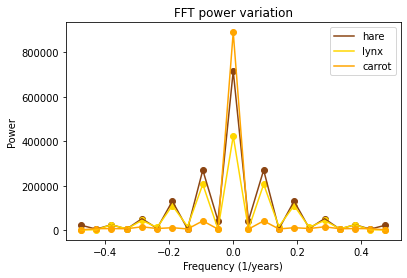

In [95]:
fig, ax = plt.subplots()

def find_period(df, item, ax, colore):
    l=np.array(df[item])

    f = pd.DataFrame({     #Dataframe with powers of fft as a function of the frequencies 
        "freq": fftpack.fftfreq(l.size, d=1), 
        "power": abs(fftpack.fft(l)) 
    }).sort_values('freq')


    positive=f[f["freq"]>0]  #selects the frequency with maximum power
    id_max= positive["power"].idxmax()
    freq_max= f["freq"][id_max]

    ax.plot(f["freq"], f["power"], c=colore, label=item)  #add the spectrum to the plot
    ax.scatter(f["freq"], f["power"],  c=colore)
    
    print("Period variation of ", item, " = %.6f" % (1/freq_max), " years")


find_period(df,"hare", ax, "saddlebrown")
find_period(df,"lynx", ax, "gold")
find_period(df,"carrot", ax, "orange") 

plt.xlabel("Frequency (1/years)")
plt.ylabel("Power")
plt.title("FFT power variation")
plt.legend()
plt.show()

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

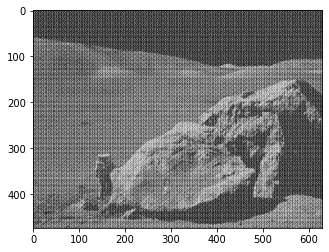

In [5]:
image=plt.imread("moonlanding.png")
plt.imshow(image,cmap = plt.get_cmap('gray'))
plt.show()

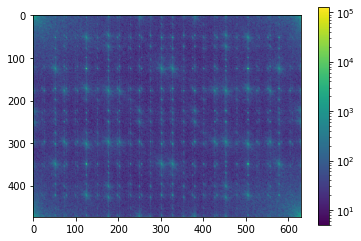

In [16]:
from matplotlib.colors import LogNorm
from scipy.fftpack import fft2

transform=scipy.fftpack.fft2(image)

plot = plt.imshow(np.abs(transform), norm=LogNorm(vmin=5))
plt.colorbar(plot)
plt.show()


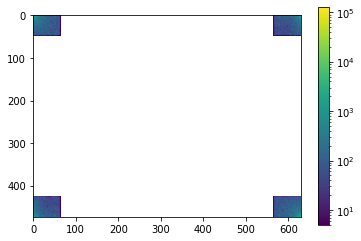

In [58]:
r, c = np.shape(transform)
transform2 = transform.copy()

keep_fraction=0.1

transform2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
transform2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plot = plt.imshow(np.abs(transform2), norm=LogNorm(vmin=5))
plt.colorbar(plot)
plt.show()

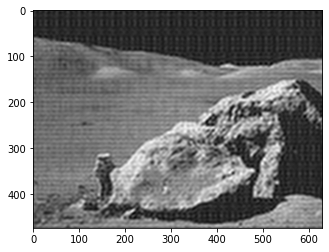

In [59]:
image_coorrected = abs(fftpack.ifft2(transform2))

plt.imshow(image_coorrected, cmap = plt.get_cmap('gray'))

474


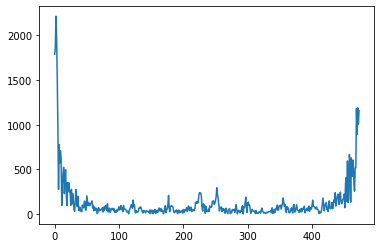

In [38]:
plt.plot(np.arange(0,474), abs(transform[:,3]))
print(len(abs(transform[:,3])))

In [46]:
from scipy import fftpack

real_filtered_signal=[ [] for _ in range(len(transform)) ]

for i in range(len(transform)):
    power = np.abs(transform[i]) # these are the "weights" of the Fourier components for each discrete frequency interval

    # The return the corresponding frequencies
    sample_freq = fftpack.fftfreq(transform[i].size)

    # Plot the FFT power
    #plt.figure(figsize=(8, 6))
    #plt.plot(sample_freq, power)
    #plt.xlabel('Frequency [Hz]')
    #plt.ylabel('Power')

    pos_mask = np.where(sample_freq >= 0)
    freqs = sample_freq[pos_mask]
    powes = power[pos_mask]
    # find the max of freqs array
    peak_freq = freqs[powes.argmax()]
    #print("Peak frequency:", peak_freq)
    
    high_freq_fft = transform[i].copy()
    # filter (set to zero) all high frequency components that are larger than peak_freq
    high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
    # calculate the Inverse Fast Fourier Transform
    filtered_sig = fftpack.ifft(high_freq_fft)
    # only take the real part
    real_filtered_signal[i] = np.real(filtered_sig)


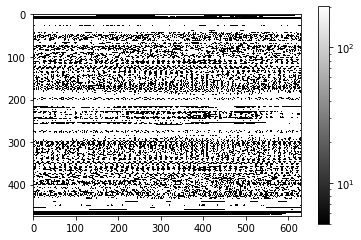

In [48]:
plot = plt.imshow(real_filtered_signal,norm=LogNorm(vmin=5), cmap = plt.get_cmap('gray'))
plt.colorbar(plot)
plt.show()

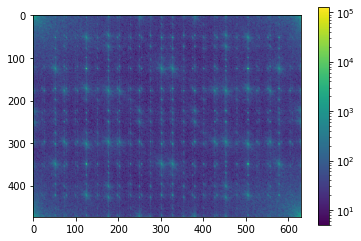

In [36]:
transform[np.abs(transform)<10^3]=0

plot = plt.imshow(np.abs(transform), norm=LogNorm(vmin=5))
plt.colorbar(plot)
plt.show()

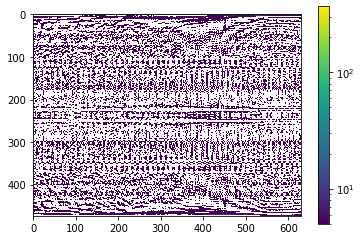

In [37]:
from scipy import fftpack

filtered_sig = fftpack.ifft(transform)
real_filtered_signal = np.real(filtered_sig)

plot = plt.imshow(real_filtered_signal,norm=LogNorm(vmin=5))
plt.colorbar(plot)